Processing client folder: client_0
Processing train_data.pt
Number of data samples: 6000


C:\Users\arpit\AppData\Local\Temp\ipykernel_32116\3364378254.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(file_path)


Processing val_data.pt
Number of data samples: 1000
Processing client folder: client_1
Processing train_data.pt
Number of data samples: 6000
Processing val_data.pt
Number of data samples: 1000
Processing client folder: client_2
Processing train_data.pt
Number of data samples: 6000
Processing val_data.pt
Number of data samples: 1000
Processing client folder: client_3
Processing train_data.pt
Number of data samples: 6000
Processing val_data.pt
Number of data samples: 1000
Processing client folder: client_4
Processing train_data.pt
Number of data samples: 6000
Processing val_data.pt
Number of data samples: 1000
Processing client folder: client_5
Processing train_data.pt
Number of data samples: 6000
Processing val_data.pt
Number of data samples: 1000
Processing client folder: client_6
Processing train_data.pt
Number of data samples: 6000
Processing val_data.pt
Number of data samples: 1000
Processing client folder: client_7
Processing train_data.pt
Number of data samples: 6000
Processing va

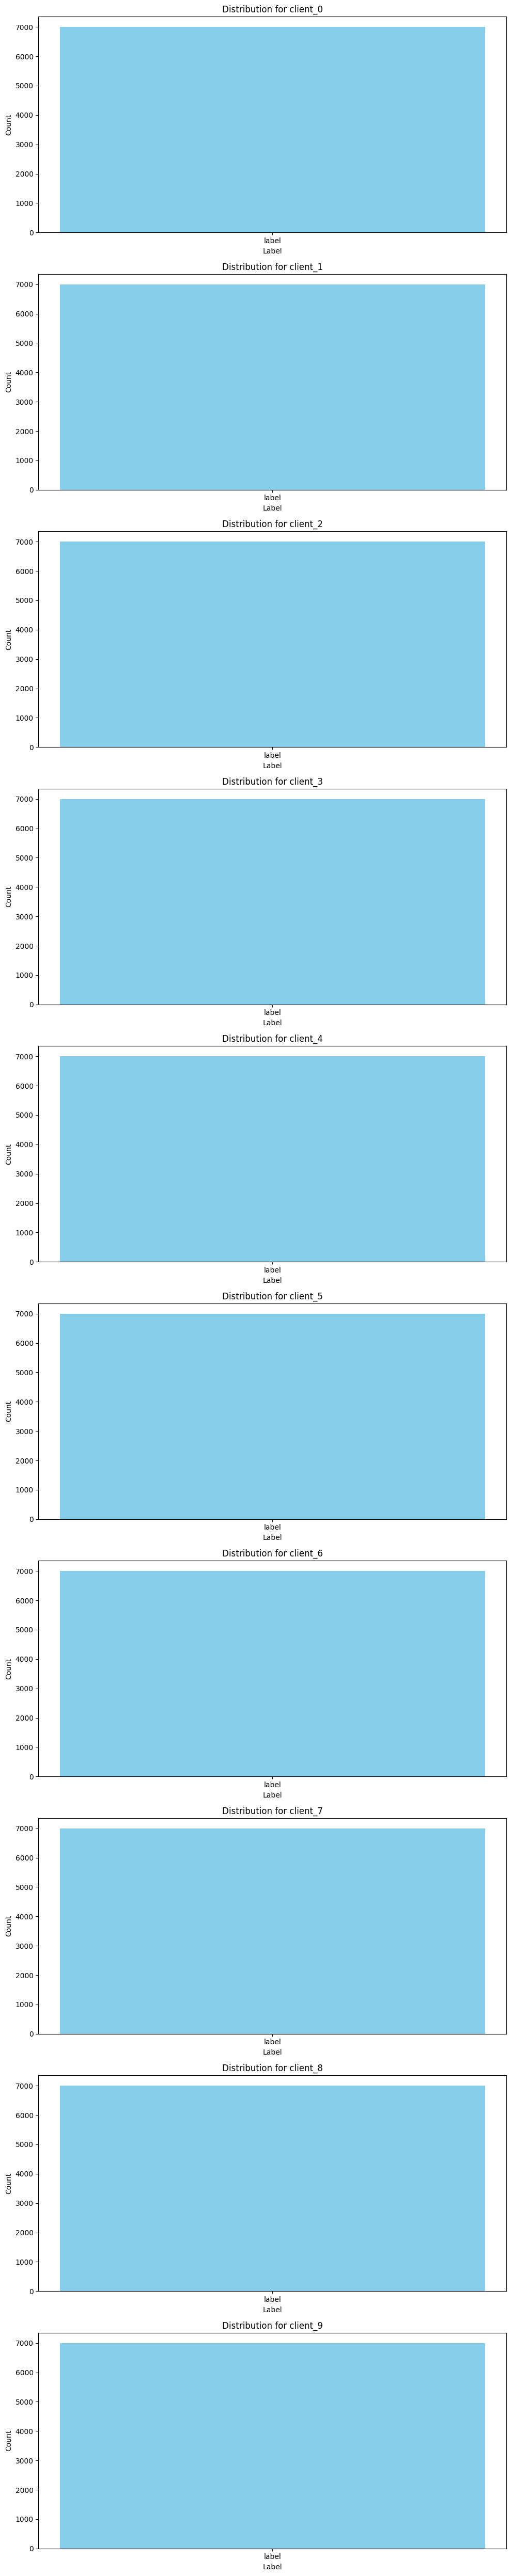

In [23]:
import os
import torch
import matplotlib.pyplot as plt
from collections import Counter

# Path to the clients_dataset folder
clients_dataset_path = '../src/clients_dataset'

# Function to load data and count label distribution
def load_and_count_labels(client_folder):
    label_counts = Counter()  # Initialize a Counter for labels
    for file_name in os.listdir(client_folder):
        print(f'Processing {file_name}')

        if file_name.endswith('.pt'):
            file_path = os.path.join(client_folder, file_name)
            try:
                data = torch.load(file_path)
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
                continue

            print(f'Number of data samples: {len(data)}')
            for sample in data:
                try:
                    # Unpack the sample into image and label
                    image, label = sample
                    label_counts[label] += 1  # Count the label occurrence
                except Exception as e:
                    print(f"Error unpacking sample {sample}: {e}")
                    continue
    return label_counts

# Iterate over each client folder and collect label distributions
client_label_distributions = {}
for client_folder in os.listdir(clients_dataset_path):
    print(f'Processing client folder: {client_folder}')
    client_path = os.path.join(clients_dataset_path, client_folder)
    if os.path.isdir(client_path):
        client_label_distributions[client_folder] = load_and_count_labels(client_path)

# Plot the distributions
num_clients = len(client_label_distributions)
fig, axs = plt.subplots(num_clients, 1, figsize=(10, 5 * num_clients))

# If only one client exists, wrap axs in a list for consistency
if num_clients == 1:
    axs = [axs]

for i, (client, label_counts) in enumerate(client_label_distributions.items()):
    axs[i].bar(label_counts.keys(), label_counts.values(), color='skyblue')
    axs[i].set_title(f'Distribution for {client}')
    axs[i].set_xlabel('Label')
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
import torch

# Load the data
data = torch.load("../src/clients_dataset/client_0/train_data_for_round_0.pt")

# Check the type of data
print(f"Type of data: {type(data)}")

# Check the length (number of batches)
print(f"Number of batches: {len(data)}")

# Inspect the first batch
first_batch = data[0]
print(f"Type of first batch: {type(first_batch)}")
print(f"Keys in the first batch: {first_batch.keys()}")

# Check shapes and data types of elements in the first batch
for key, value in first_batch.items():
    print(f"{key}: Type={type(value)}, Shape={value.shape if hasattr(value, 'shape') else 'N/A'}")


In [ ]:
import torch

# Load the data
data = torch.load("../src/clients_dataset/client_0/val_data.pt")

# Check the type of data
print(f"Type of data: {type(data)}")

# Check the length (number of batches)
print(f"Number of batches: {len(data)}")

# Inspect the first batch
first_batch = data[0]
print(f"Type of first batch: {type(first_batch)}")
print(f"Keys in the first batch: {first_batch.keys()}")

# Check shapes and data types of elements in the first batch
for key, value in first_batch.items():
    print(f"{key}: Type={type(value)}, Shape={value.shape if hasattr(value, 'shape') else 'N/A'}")

In [ ]:
from flwr_datasets import FederatedDataset
from flwr_datasets.partitioner import DirichletPartitioner


partitioner = DirichletPartitioner(
    num_partitions=3,
    partition_by="label",
    alpha=0.1,
    self_balancing=True,
)

# Load the dataset
fds = FederatedDataset(
    dataset="mnist", partitioners={"train": partitioner}
)


# Print the size of the dataset
total_samples = 0

for partition in range(3):
    print(f"Number of samples in the {partition} partition: {fds.load_partition(partition).__len__()}")
    total_samples += fds.load_partition(partition).__len__()
    
print(f"Total number of samples: {total_samples}")
